<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,21.876562,37.449527,258.098949,213.296430,44.802519
1,0.0,1.0,57.329540,88.266135,33.974483,50.262247,-580.789134,-340.956728,212.705283,-553.662012
2,0.0,2.0,45.215694,22.043105,89.071799,69.804692,-46.372513,189.762776,267.686056,-77.923279
3,0.0,3.0,69.375325,71.150993,24.742899,82.214303,-107.081213,150.402308,224.832433,-74.430126
4,0.0,4.0,87.837297,47.725671,65.999025,57.222775,73.727149,342.511916,259.209248,83.302668
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.436782,42.382575,71.198338,44.570714,-81.605534,120.982874,201.121228,-80.138354
249996,999.0,246.0,87.681287,91.864031,54.033479,22.842744,336.403702,602.825244,306.830854,295.994390
249997,999.0,247.0,87.743793,97.197816,78.219199,55.915357,-100.461366,228.614799,346.042603,-117.427804
249998,999.0,248.0,36.274014,63.552257,86.313455,98.232329,-166.337399,128.034656,281.822971,-153.788315


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    68.854520  58.707153  61.211187  21.876562   37.449527   
      1.0    57.329540  88.266135  33.974483  50.262247 -580.789134   
      2.0    45.215694  22.043105  89.071799  69.804692  -46.372513   
      3.0    69.375325  71.150993  24.742899  82.214303 -107.081213   
      4.0    87.837297  47.725671  65.999025  57.222775   73.727149   
...                ...        ...        ...        ...         ...   
999.0 245.0  34.436782  42.382575  71.198338  44.570714  -81.605534   
      246.0  87.681287  91.864031  54.033479  22.842744  336.403702   
      247.0  87.743793  97.197816  78.219199  55.915357 -100.461366   
      248.0  36.274014  63.552257  86.313455  98.232329 -166.337399   
      249.0  82.052680  63.134744  90.658667  77.433614  206.587128   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    258.098949  213.296430   44.802519  
      1.0   -340.956728  212.705283 -553.662012  
      2.0    189.762776  267.686056  -77.923279  
      3.0    150.402308  224.832433  -74.430126  
      4.0    342.511916  259.209248   83.302668  
...                 ...         ...         ...  
999.0 245.0  120.982874  201.121228  -80.138354  
      246.0  602.825244  306.830854  295.994390  
      247.0  228.614799  346.042603 -117.427804  
      248.0  128.034656  281.822971 -153.788315  
      249.0  529.866834  302.964070  226.902764  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    68.854520  58.707153  61.211187  21.876562   37.449527   
      1.0    57.329540  88.266135  33.974483  50.262247 -580.789134   
      2.0    45.215694  22.043105  89.071799  69.804692  -46.372513   
      3.0    69.375325  71.150993  24.742899  82.214303 -107.081213   
      4.0    87.837297  47.725671  65.999025  57.222775   73.727149   
...                ...        ...        ...        ...         ...   
999.0 245.0  34.436782  42.382575  71.198338  44.570714  -81.605534   
      246.0  87.681287  91.864031  54.033479  22.842744  336.403702   
      247.0  87.743793  97.197816  78.219199  55.915357 -100.461366   
      248.0  36.274014  63.552257  86.313455  98.232329 -166.337399   
      249.0  82.052680  63.134744  90.658667  77.433614  206.587128   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    258.098949  213.296430   44.802519  
      1.0   -340.956728  212.705283 -553.662012  
      2.0    189.762776  267.686056  -77.923279  
      3.0    150.402308  224.832433  -74.430126  
      4.0    342.511916  259.209248   83.302668  
...                 ...         ...         ...  
999.0 245.0  120.982874  201.121228  -80.138354  
      246.0  602.825244  306.830854  295.994390  
      247.0  228.614799  346.042603 -117.427804  
      248.0  128.034656  281.822971 -153.788315  
      249.0  529.866834  302.964070  226.902764  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,21.876562,37.449527,258.098949,213.296430,44.802519
1,0.0,1.0,57.329540,88.266135,33.974483,50.262247,-580.789134,-340.956728,212.705283,-553.662012
2,0.0,2.0,45.215694,22.043105,89.071799,69.804692,-46.372513,189.762776,267.686056,-77.923279
3,0.0,3.0,69.375325,71.150993,24.742899,82.214303,-107.081213,150.402308,224.832433,-74.430126
4,0.0,4.0,87.837297,47.725671,65.999025,57.222775,73.727149,342.511916,259.209248,83.302668
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.436782,42.382575,71.198338,44.570714,-81.605534,120.982874,201.121228,-80.138354
249996,999.0,246.0,87.681287,91.864031,54.033479,22.842744,336.403702,602.825244,306.830854,295.994390
249997,999.0,247.0,87.743793,97.197816,78.219199,55.915357,-100.461366,228.614799,346.042603,-117.427804
249998,999.0,248.0,36.274014,63.552257,86.313455,98.232329,-166.337399,128.034656,281.822971,-153.788315


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    68.854520  58.707153  61.211187  21.876562   37.449527   
      1.0    57.329540  88.266135  33.974483  50.262247 -580.789134   
      2.0    45.215694  22.043105  89.071799  69.804692  -46.372513   
      3.0    69.375325  71.150993  24.742899  82.214303 -107.081213   
      4.0    87.837297  47.725671  65.999025  57.222775   73.727149   
...                ...        ...        ...        ...         ...   
999.0 245.0  34.436782  42.382575  71.198338  44.570714  -81.605534   
      246.0  87.681287  91.864031  54.033479  22.842744  336.403702   
      247.0  87.743793  97.197816  78.219199  55.915357 -100.461366   
      248.0  36.274014  63.552257  86.313455  98.232329 -166.337399   
      249.0  82.052680  63.134744  90.658667  77.433614  206.587128   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    258.098949  213.296430   44.802519  
      1.0   -340.956728  212.705283 -553.662012  
      2.0    189.762776  267.686056  -77.923279  
      3.0    150.402308  224.832433  -74.430126  
      4.0    342.511916  259.209248   83.302668  
...                 ...         ...         ...  
999.0 245.0  120.982874  201.121228  -80.138354  
      246.0  602.825244  306.830854  295.994390  
      247.0  228.614799  346.042603 -117.427804  
      248.0  128.034656  281.822971 -153.788315  
      249.0  529.866834  302.964070  226.902764  

[250000 rows x 8 columns]

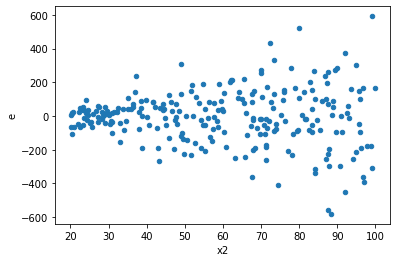

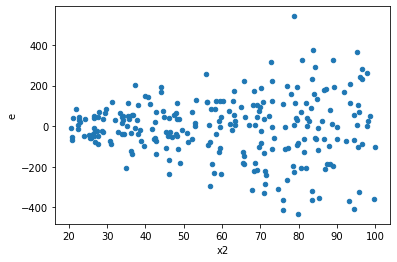

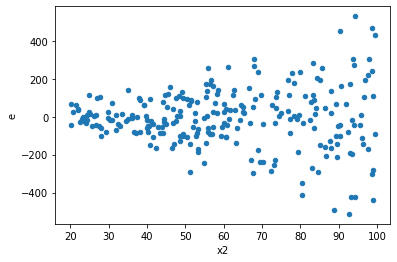

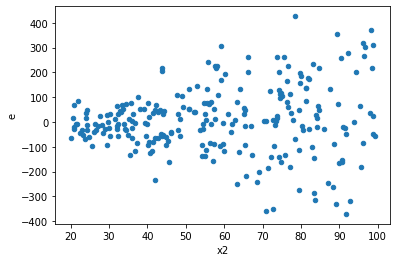

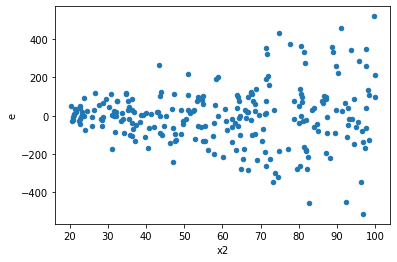

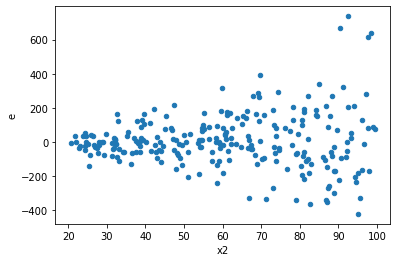

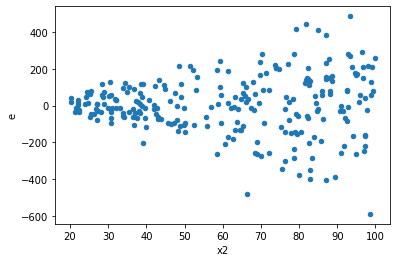

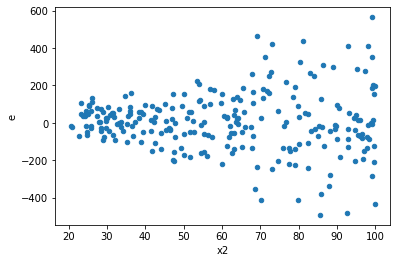

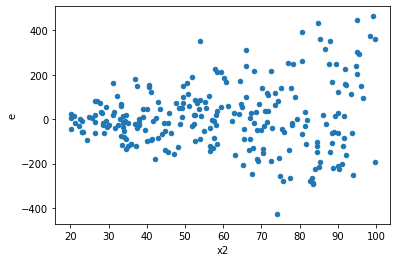

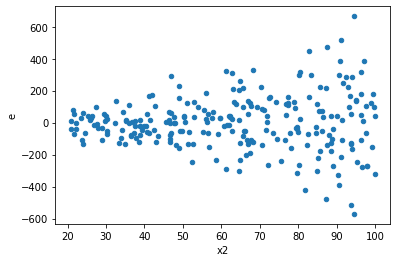

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,127.0,115.0,2203322.0705882898,3591332.112937606,17348.992681797557,31228.974895109615,1.8000454244167639,0.001465171518992392,0.9992674142405038,0.000732585759496196,Reject001=0 : Heteroscedasticity
3.0,133.0,109.0,1193967.9325725487,3199461.048970803,8977.20250054548,29352.8536602826,3.2697105427329993,6.477305358743024e-10,0.9999999996761347,3.238652679371512e-10,Reject001=0 : Heteroscedasticity
6.0,136.0,106.0,2116475.419024958,4097751.75857575,15562.319257536454,38658.035458261795,2.4840793212451704,1.7388108501936728e-06,0.9999991305945749,8.694054250968364e-07,Reject001=0 : Heteroscedasticity
7.0,126.0,116.0,2232354.3703663694,3879431.623732856,17717.098177510867,33443.37606666255,1.8876328240430353,0.0005853162709281712,0.9997073418645359,0.0002926581354640856,Reject001=0 : Heteroscedasticity
8.0,118.0,124.0,1361517.9725978947,3726024.5270527876,11538.28790337199,30048.584895586995,2.6042498806781804,2.2472007144003214e-07,0.9999998876399643,1.1236003572001607e-07,Reject001=0 : Heteroscedasticity
10.0,132.0,110.0,2219558.365707645,3220958.443103497,16814.836103845795,29281.44039184997,1.7414050432018713,0.002856515786477498,0.9985717421067613,0.001428257893238749,Reject001=0 : Heteroscedasticity
15.0,145.0,97.0,2090165.8893481554,2454732.567921524,14414.937167918313,25306.521318778596,1.7555762487193107,0.003256588320813547,0.9983717058395932,0.0016282941604067735,Reject001=0 : Heteroscedasticity
16.0,134.0,108.0,2363503.909292773,2987891.95361048,17638.0888753192,27665.66623713407,1.5685183600501276,0.015507929427131417,0.9922460352864343,0.007753964713565709,Reject001=1 : Homoscedasticity
18.0,137.0,105.0,2805862.982322878,3164461.031071536,20480.751695787432,30137.724105443198,1.4715145495192958,0.038490083030099376,0.9807549584849503,0.019245041515049688,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,106.0,136.0,3558336.4022627748,2656316.4603221654,33569.21134210165,19531.73867883945,0.5818348986454515,0.003820578591320153,Reject001=0 : Heteroscedasticity
1.0,108.0,134.0,3506176.388879611,2130492.037747637,32464.596193329733,15899.194311549529,0.4897394754848736,0.00014352901118023844,Reject001=0 : Heteroscedasticity
2.0,127.0,115.0,2203322.0705882898,3591332.112937606,17348.992681797557,31228.974895109615,1.8000454244167639,0.001465171518992392,Reject001=0 : Heteroscedasticity
3.0,133.0,109.0,1193967.9325725487,3199461.048970803,8977.20250054548,29352.8536602826,3.2697105427329993,6.477305358743024e-10,Reject001=0 : Heteroscedasticity
4.0,120.0,122.0,3832814.5431958516,1650494.3428741617,31940.121193298764,13528.642154706244,0.42356264313563835,3.49014496303045e-06,Reject001=0 : Heteroscedasticity
5.0,136.0,106.0,4818062.626955471,1413107.4308098515,35426.93108055493,13331.202177451429,0.37630135523561153,9.631198191217427e-08,Reject001=0 : Heteroscedasticity
6.0,136.0,106.0,2116475.419024958,4097751.75857575,15562.319257536454,38658.035458261795,2.4840793212451704,1.7388108501936728e-06,Reject001=0 : Heteroscedasticity
7.0,126.0,116.0,2232354.3703663694,3879431.623732856,17717.098177510867,33443.37606666255,1.8876328240430353,0.0005853162709281712,Reject001=0 : Heteroscedasticity
8.0,118.0,124.0,1361517.9725978947,3726024.5270527876,11538.28790337199,30048.584895586995,2.6042498806781804,2.2472007144003214e-07,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    666
Reject001=1 : Homoscedasticity      334
Name: Result_test, dtype: int64